In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cleaned_salary.csv')

In [3]:
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,Job_state,Same_state,Age,python_pres,r_pres,spark_pres,aws_pres,excel_pres
0,Data Scientist,"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,...,91,72.0,NM,0,50,1,0,0,0,1
1,Healthcare Data Scientist,What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,...,112,87.5,MD,0,39,1,0,0,0,0
2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,...,90,85.0,FL,1,13,1,0,1,0,1
3,Data Scientist,*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,...,97,76.5,WA,1,58,1,0,0,0,0
4,Data Scientist,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,...,143,114.5,NY,1,25,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Hour', 'Employer_provided',
       'Salary Estimate_n', 'min_salary', 'max_salary', 'avg_salary',
       'Job_state', 'Same_state', 'Age', 'python_pres', 'r_pres', 'spark_pres',
       'aws_pres', 'excel_pres'],
      dtype='object')

In [5]:
df['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

feature eng on the job title

In [6]:
def new_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'analyst' in title.lower() or 'analysis' in title.lower():
        return 'analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower() :
        return 'mle'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def senior_func(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() :
        return 'sr'
    elif 'jr' in title.lower() or 'jr.' in title.lower() :
        return 'jr'
    else:
        return 'na'

In [7]:
df['job_simp']=df['Job Title'].apply(new_title)

In [8]:
df['job_senior']=df['Job Title'].apply(senior_func)

In [9]:
df.job_simp.value_counts()

data scientist    279
na                156
data engineer     151
analyst           110
manager            22
director           14
mle                10
Name: job_simp, dtype: int64

In [10]:
df.Job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: Job_state, dtype: int64

fixing los angeles

In [11]:
df['Job_state']=df['Job_state'].apply(lambda x: 'LA' if 'Los Angeles' in x else x.strip())

description length

In [12]:
df['desc_len']=df['Job Description'].apply(lambda x: len(x))
df['desc_len'].head()

0    2555
1    4828
2    3495
3    3926
4    2748
Name: desc_len, dtype: int64

In [13]:
df['Competitors'][0]

'-1'

calculating the number of competitors

In [14]:
df['comp_count']=df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

In [15]:
df['comp_count'].value_counts()

0    460
3    228
2     41
1     12
4      1
Name: comp_count, dtype: int64

hourly wage to annual wage

In [16]:
df['min_salary']=df.apply(lambda x:x.min_salary*2 if x.Hour==1 else x.min_salary,axis=1)
df['max_salary']=df.apply(lambda x: x.max_salary*2 if x.Hour==1 else x.max_salary, axis=1)

In [17]:
df[df['Hour']==1][['Hour','min_salary','max_salary']]

,Hour,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [18]:
df['Job Description'][0]

'Data Scientist\r\nLocation: Albuquerque, NM\r\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\r\nSkills Required:\r\nBachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D\r\nApplicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorithmic aptitude\r\nExcellent verbal and written communication skills, and quantitative analytical skills are required\r\nApplicant must be able to work in a team environment\r\nU.S. citizenship and ability to obtain a DoD Secret Clearance required\r\nResponsibilities: The applicant will be responsible for formulating analytical solutions to complex data problems; creating data analytic mode

removing /r /n char

In [19]:
df['Job Description']=df['Job Description'].apply(lambda x:x.replace("\r\n",' '))

In [20]:
df['Job Description'][0]

'Data Scientist Location: Albuquerque, NM Education Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences. Skills Required: Bachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D Applicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorithmic aptitude Excellent verbal and written communication skills, and quantitative analytical skills are required Applicant must be able to work in a team environment U.S. citizenship and ability to obtain a DoD Secret Clearance required Responsibilities: The applicant will be responsible for formulating analytical solutions to complex data problems; creating data analytic models to improve data metrics;

In [21]:
df.describe()

,Rating,Founded,Hour,Employer_provided,min_salary,max_salary,avg_salary,Same_state,Age,python_pres,r_pres,spark_pres,aws_pres,excel_pres,desc_len,comp_count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,49.389488,0.528302,0.001348,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.962906,0.499535,0.036711,0.417908,0.425651,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,62.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [22]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Hour', 'Employer_provided',
       'Salary Estimate_n', 'min_salary', 'max_salary', 'avg_salary',
       'Job_state', 'Same_state', 'Age', 'python_pres', 'r_pres', 'spark_pres',
       'aws_pres', 'excel_pres', 'job_simp', 'job_senior', 'desc_len',
       'comp_count'],
      dtype='object')

<Axes: >

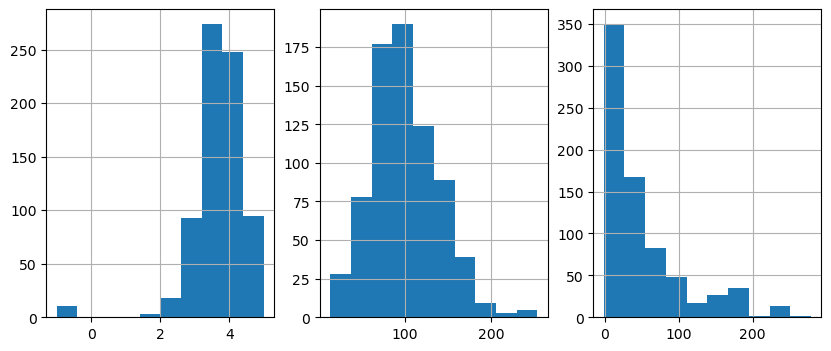

In [23]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
df['Rating'].hist()
plt.subplot(1,3,2)
df['avg_salary'].hist()
plt.subplot(1,3,3)
df['Age'].hist()

In [24]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Hour', 'Employer_provided',
       'Salary Estimate_n', 'min_salary', 'max_salary', 'avg_salary',
       'Job_state', 'Same_state', 'Age', 'python_pres', 'r_pres', 'spark_pres',
       'aws_pres', 'excel_pres', 'job_simp', 'job_senior', 'desc_len',
       'comp_count'],
      dtype='object')

<Axes: >

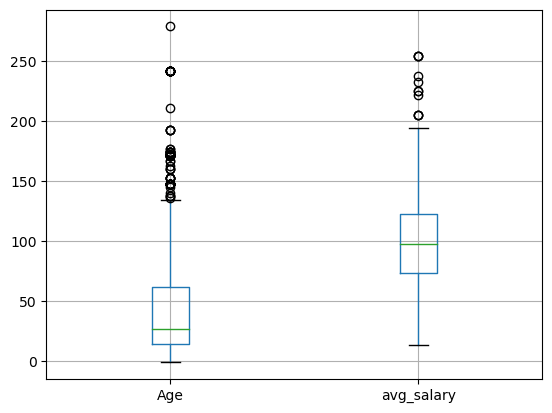

In [25]:
df.boxplot(column=['Age','avg_salary'])

<Axes: >

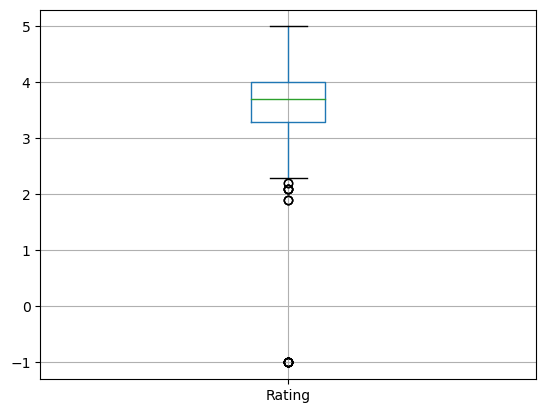

In [26]:
df.boxplot('Rating')

In [27]:
df['Size'].dtype=='O'

True

In [28]:
categorical_col=[]
numerical_col=[]
for x in df.columns:
    if(df[x].dtype=='O'):
        categorical_col.append(x)
    else:
        numerical_col.append(x)

<Axes: >

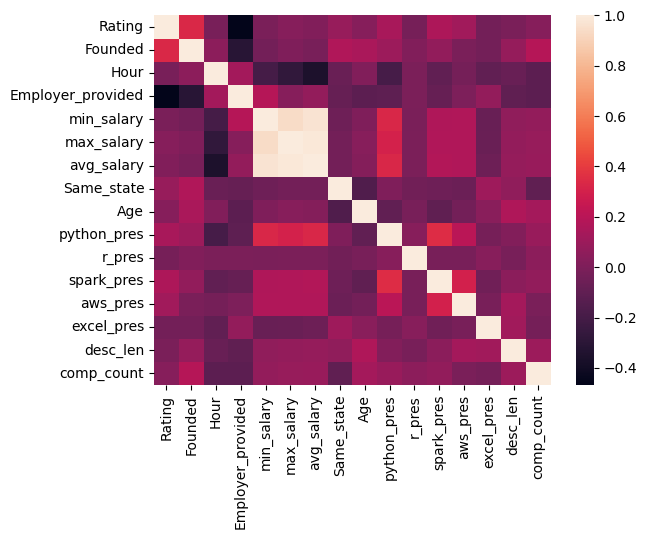

In [29]:
sns.heatmap(df[numerical_col].corr())

In [30]:
df[categorical_col].head()

,Job Title,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors,Salary Estimate_n,Job_state,job_simp,job_senior
0,Data Scientist,"Data Scientist Location: Albuquerque, NM Educa...",Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53-91,NM,data scientist,na
1,Healthcare Data Scientist,What You Will Do: I. General Summary The Hea...,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63-112,MD,data scientist,na
2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80-90,FL,data scientist,na
3,Data Scientist,*Organization and Job ID** Job ID: 310709 Dir...,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56-97,WA,data scientist,na
4,Data Scientist,Data Scientist Affinity Solutions / Marketing ...,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86-143,NY,data scientist,na


Graph for  Type of ownership


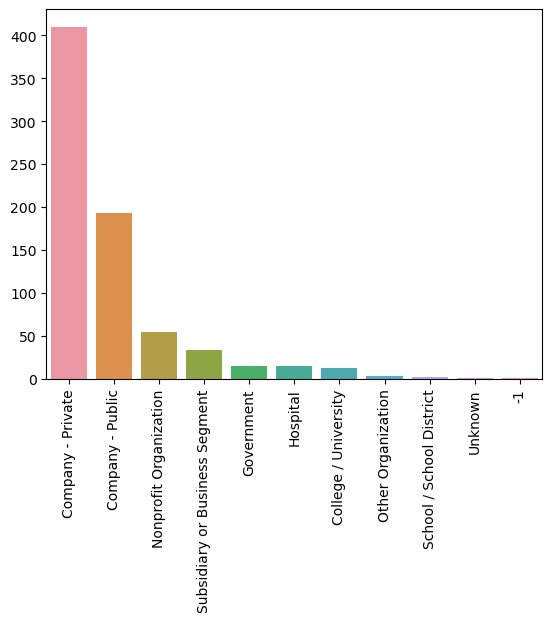

Graph for  Sector


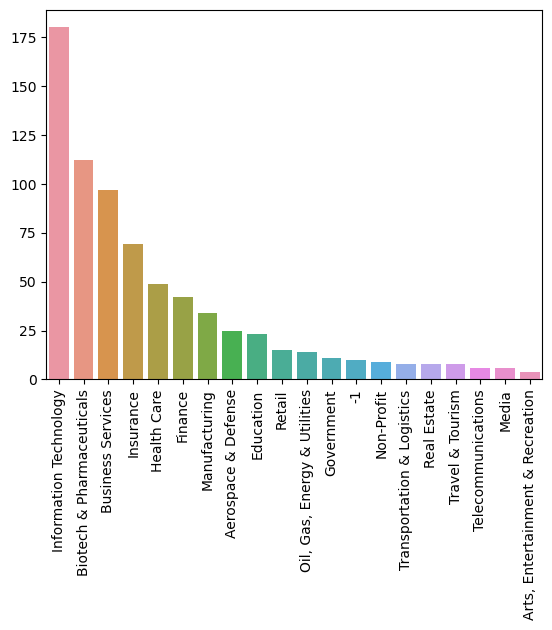

Graph for  Job_state


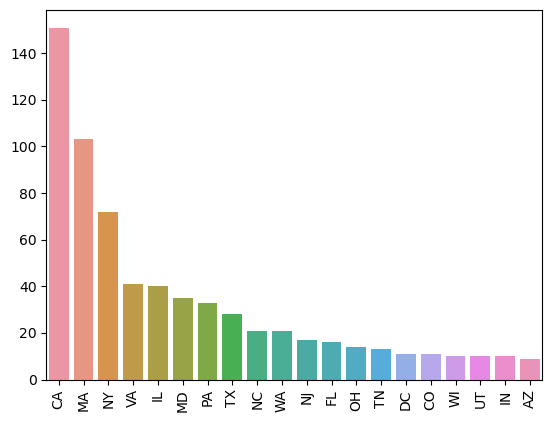

Graph for  job_simp


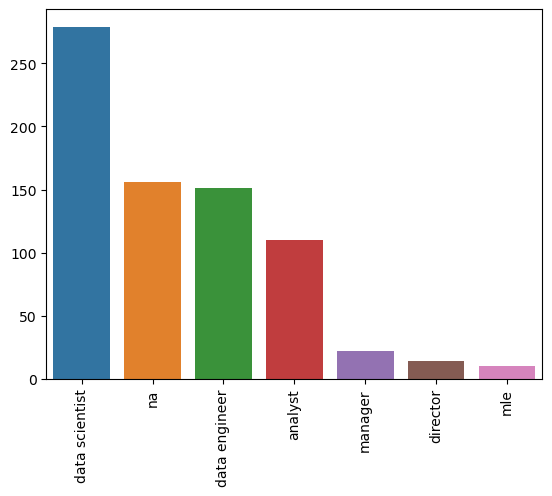

Graph for  job_senior


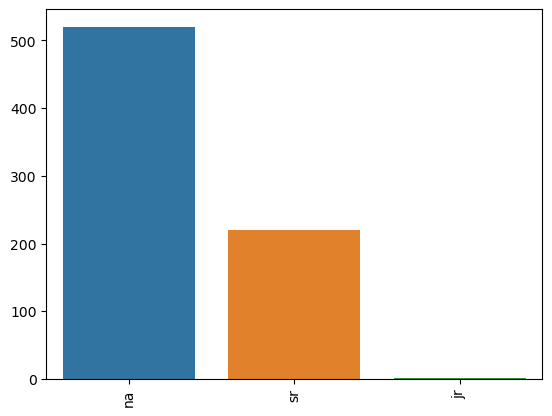

In [31]:
cat_new=[ele for ele in categorical_col if ele not in ['Job Title','Job Description','Company Name','Location','Headquarters','Revenue','Competitors','Size','Industry','Salary Estimate_n']]
for i in cat_new:
    num1=df[i].value_counts()[:20]
    print("Graph for  %s" %(i))
    chart=sns.barplot(x=num1.index,y=num1.values)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [32]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Hour', 'Employer_provided',
       'Salary Estimate_n', 'min_salary', 'max_salary', 'avg_salary',
       'Job_state', 'Same_state', 'Age', 'python_pres', 'r_pres', 'spark_pres',
       'aws_pres', 'excel_pres', 'job_simp', 'job_senior', 'desc_len',
       'comp_count'],
      dtype='object')

Creating pivot tables

In [33]:
pd.pivot_table(df,index='job_simp',values='avg_salary')

,avg_salary
job_simp,
analyst,67.677273
data engineer,103.582781
data scientist,117.564516
director,168.607143
manager,84.022727
mle,134.200000
na,84.791667


In [34]:
pd.pivot_table(df,index=['job_simp','job_senior'],values='avg_salary')

avg_salary
job_simp       job_senior            
analyst        jr           56.500000
               na           61.775641
               sr           82.887097
data engineer  na           97.635514
               sr          118.045455
data scientist jr          106.500000
               na          107.043011
               sr          138.956522
director       na          168.607143
manager        na           84.022727
mle            na          115.833333
               sr          142.071429
na             na           72.959091
               sr          113.086957

In [35]:
pd.pivot_table(df,index='Job_state',values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
Job_state,
CA,123.619205
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [36]:
pd.set_option('display.max_rows',None)

In [37]:
pd.pivot_table(df,index=['Job_state','job_simp'],values='avg_salary').sort_values('Job_state',ascending=False)

avg_salary
Job_state job_simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        data scientist   99.764706
          analyst          65.250000
VA        data scientist  108.416667
          data engineer    90.558824
          analyst          71.583333
UT        data scientist  140.500000
          data engineer   100.333333
          analyst          54.750000
TX        data engineer   104.750000
          data scientist  100.730769
          na               29.200000
TN        data scientist   96.000000
          data engineer   100.950000
          analyst          13.500000
SC        na               60.500000
RI        analyst         100.000000
PA        na               76.062500
          mle             120.500000
          manager         109.666667
          data scientist  113.333333
          data engineer    91.500000
          analyst          62.750000
OR        data scientist   98.500000
          data engineer    73.000000
OH        data scientist  105.285714
          data engineer    86.500000
          analyst          53.875000
          na               93.500000
NY        na               81.583333
          data scientist  115.250000
          data engineer    99.250000
          analyst          65.607143
NM        data scientist   74.333333
NJ        data engineer   112.000000
          director        161.500000
          analyst          83.583333
          data scientist  106.875000
          manager         109.500000
          na               82.500000
NE        na               41.000000
NC        na               96.000000
          data scientist  117.000000
          data engineer   104.250000
          analyst          65.500000
MO        na               72.333333
          manager          40.500000
          data scientist  127.666667
          analyst          61.000000
MN        analyst          76.000000
          data engineer    95.000000
MI        data scientist  106.625000
          manager          87.500000
MD        na               86.708333
          data engineer   100.928571
          analyst          80.666667
          data scientist  109.115385
MA        na              113.127907
          manager          71.900000
          director        117.833333
          data scientist  113.750000
          data engineer    91.133333
          analyst          59.125000
LA        analyst          48.000000
          data scientist  107.500000
          data engineer    70.500000
          na               20.000000
KY        na              103.500000
          data scientist   84.000000
KS        data engineer    87.000000
IN        na               66.500000
          data scientist   84.500000
          data engineer    95.357143
IL        analyst          64.500000
          na               57.166667
          mle             133.000000
          director        221.750000
          data scientist  117.233333
          data engineer   101.500000
ID        analyst          56.250000
IA        analyst          43.000000
          data engineer   102.833333
GA        na               80.000000
          data scientist   81.333333
FL        data scientist   97.357143
          data engineer    91.833333
          analyst          47.500000
DE        na               27.500000
DC        data scientist  149.000000
          data engineer    85.000000
          analyst          63.500000
CT        data scientist   84.000000
          na               62.500000
CO        analyst          29.500000
          data engineer    99.375000
          data scientist  108.666667
          na               31.500000
CA        na               91.750000
          mle             232.500000
          manager          80.611111
          data scientist  143.044776
          data engineer   134.843750
          analyst          89.750000
AZ        data scientist   69.500000
          data engineer    79.

In [38]:
pd.pivot_table(df,index=['Job_state','job_simp'],values='avg_salary',aggfunc='count').sort_values('Job_state',ascending=False)

avg_salary
Job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        data scientist          17
          analyst                  4
VA        data scientist          18
          data engineer           17
          analyst                  6
UT        data scientist           3
          data engineer            3
          analyst                  4
TX        data engineer           10
          data scientist          13
          na                       5
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        na                       8
          mle                      7
          manager                  3
          data scientist           6
          data engineer            1
          analyst                  8
OR        data scientist           3
          data engineer            1
OH        data scientist           7
          data engineer            1
          analyst                  4
          na                       2
NY        na                      12
          data scientist          40
          data engineer            6
          analyst                 14
NM        data scientist           3
NJ        data engineer            2
          director                 2
          analyst                  6
          data scientist           4
          manager                  2
          na                       1
NE        na                       4
NC        na                      10
          data scientist           3
          data engineer            6
          analyst                  2
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        analyst                  1
          data engineer            1
MI        data scientist           4
          manager                  2
MD        na                      12
          data engineer            7
          analyst                  3
          data scientist          13
MA        na                      43
          manager                  5
          director                 6
          data scientist          30
          data engineer           15
          analyst                  4
LA        analyst                  1
          data scientist           1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        data engineer            3
IN        na                       1
          data scientist           2
          data engineer            7
IL        analyst                  4
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            7
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        na                       3
          data scientist           3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        data scientist           2
          na                       3
CO        analyst                  1
          data engineer            4
          data scientist           3
          na                       3
CA        na                      20
          mle                      1
          manager                  9
          data scientist          67
          data engineer           32
          analyst                 22
AZ        data scientist           1
          data engineer       

Comparing avg salary with various categories

In [39]:
numerical_col

['Rating',
 'Founded',
 'Hour',
 'Employer_provided',
 'min_salary',
 'max_salary',
 'avg_salary',
 'Same_state',
 'Age',
 'python_pres',
 'r_pres',
 'spark_pres',
 'aws_pres',
 'excel_pres',
 'desc_len',
 'comp_count']

In [40]:
df_pivot=df[['Rating','Type of ownership','Sector','Revenue','Job_state','python_pres','r_pres','spark_pres','aws_pres','excel_pres','job_simp','job_senior','Employer_provided']]

In [41]:
for i in df_pivot.columns:
    print("Pivot for %s"%(i))
    print(pd.pivot_table(df,index=i,values='avg_salary').sort_values('avg_salary',ascending=False))


Pivot for Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Pivot for Type of ownership
                                avg_salary
Type of ownership                         
-1                              117.500000
Company - Public                110.893782
Subsidiary or Business Segment  110.573529
College / University            107.615385
Company - Private               101.776829
Government                 

In [42]:
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [43]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yores\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yores\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

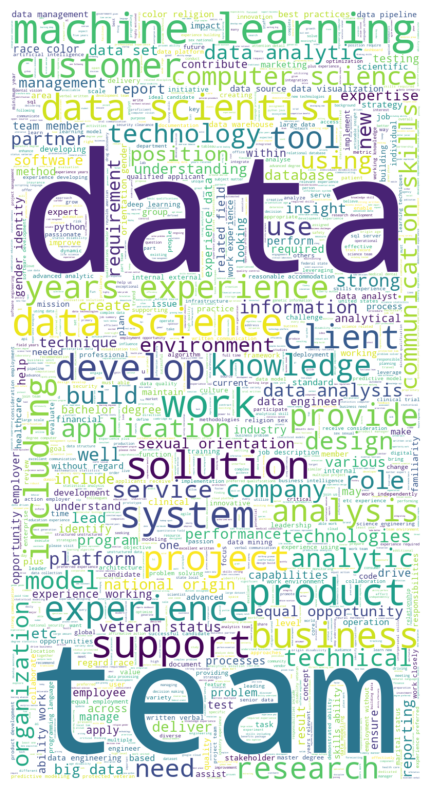

In [44]:

words=" ".join(df['Job Description'])
def punctuation_stop(text):
    # remove punctuation and stop words
    filtere=[]
    stop_words=set(stopwords.words('english'))
    word_tokens=word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtere.append(w.lower())
    return filtere
words_filter=punctuation_stop(words)
text=" ".join([ele for ele in words_filter])

wc=WordCloud(background_color ='white',random_state=1,stopwords=STOPWORDS,max_words=2000,width=800,height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df.to_csv("eda_data.csv",index=False)